# COGS 108 - Final Project 

## Overview

In this project we analyzed whether gaming streamers are prone to recieving more gaming sponsorships. To achieve this, we began by downloading the usernames of the top 50 followed streamers from Twitch from their API. Next, we downloaded the Tweets from said streamers from the Twitter API. We ran a text analysis to determine the amount of sponsorships and partnerships they had recieved from their tweets. Through the data we noticed our streamers generally got a combination of 3 types of sponsorships: Gaming, Product, and Company (explained in Data Cleaning). 

To begin our Data Analysis, we began running a sponsorship analysis to see which type of sponsorships they achieved most. Next we ran Sentiment Analysis with our compiled tweets from each streamer to achieve a sentiment score, which dictated if the streamer's personality/community was negative, neutral, or positive. Lastly, we cross referenced our sponsorship analysis with our sentiment analysis to find any connection. In our Results section we talk thoroughly about how in our tests, our sentiment score had the highest impact compared to followers and views.

## Names

- Servin Wayne Vartanian 
- Rem Talde
- Fan Yu
- Brett Salinas

## Research Question

Is there a relationship between streamer content, community engagement, and viewership statistics for the type/amount of sponsorships earned as a professional streamer? 

## Background and Prior Work

References (include links):
- 1) https://rogueenergy.com/blogs/news/the-Ultimate-guide-to-gaming-sponsorships
- 2) https://www.businessinsider.com/ninja-tyler-blevins-twitch-subscribers-fortnite-drake-youtube-2018-3

This question was of interest to our group because we all shared a general interest in Video games, esports, and the streaming community in general. We all came into this project with relatively strong background knowledge of streamers, what games they choose to broadcast as entertainment and their communities. However, something we didn’t know was why companies choose to sponsor streamers, and what criteria they have for doing so. Going past our interests, this topic is quite important for research. Understanding why/how a streamer or entertainer gets their sponsorship is crucial for people who are trying to make a living in the entertainment field. We can also deduce information as to how streamers might be changing their content or impacting the communities around them for a sponsorship.

Some research has previously been done on this topic. For example, the journal “Rogue Energy” posted a blog on The Ultimate Guide To Gaming Sponsorships, (https://rogueenergy.com/blogs/news/the-Ultimate-guide-to-gaming-sponsorships) in which they explore a similar topic to this. They reference the types of sponsorships different games/genres attract and then go into detail on what type of sponsorships to accept/deny, as well as which types to hold onto depending on the content you produce. While this source was great for seeing inside the head of sponsors, we felt that it fell short of answering our original question of what kind of streamer do you have to be and what do you have to do to earn sponsorships.

To get a possible explanation for the problem above, we can take a look at Ninja (when he was still on twitch) as an example of a successful streamer. He is highly enteractive with his audience, and has a very vocal, enthusiastic, and loud fan base in the Fortnite community. Because of this, he is one of the biggest streamers of all time. As "Business Insiders" article says, Ninja has formed partnerships with a variety of companies including Red Bull, Uber Eats, and NZXT (https://www.businessinsider.com/ninja-tyler-blevins-twitch-subscribers-fortnite-drake-youtube-2018-3). However this yet raises another question. Ninja does not always produce the most family-friendly content, (as he is known to lash out, or rage during games) yet he is able to obtain sponsorships from big product brands. 

Thus for the reasons stated above, this lead us to formulate our Research Question of "Is there a relationship between streamer content, community engagement, and viewership statistics for the type/amount of sponsorships earned as a professional streamer?" and our Hypothesis which we will state bellow. We believe that a singular factor such as game type, community engagement or views will not lead to sponsorships. What will, is a unique combination of these factors, which we plan to bring light to with our data analysis! 

## Hypothesis


Our hypothesis is that gaming streamers with positive/friendly gaming communities will mostly get Gaming Sponsorships from gaming companies, developers, and destributors, because their entire online presence is built on video games and entertainment. If game developers want their game to become more popular, it makes sense that they would sponsor streamers to play it, and by doing so, they introduce their game to a wider range of audiences.  

## Dataset(s)

- **Dataset Name:** Twitch API
- **Link to the dataset:** https://github.com/COGS108/group48_sp20/blob/master/Twitter%20CSV%20Files/twitchdata.csv
- **Number of observations:** 164 total observations (41 people x 4 columns of info containing their: 'id', 'followers', 'views', and 'sponsorships' per person.

We retrieved this information directly from the Twitch API. This is fundamentally the base of our project as the 41 users are from a list of the top 50 streamers of all time on twitch, we just chose to drop 9 of them because they were not English speaking streamers and would not work with our project for sentiment analysis. 

- **Dataset Name:** Twitter API
- **Link to the dataset:** https://github.com/COGS108/group48_sp20/tree/master/Twitter%20CSV%20Files
- **Number of observations:** 132,840 total tweets (3240 tweets per person for 41 people)

We got these 41 .CSV files from the Twitter API, gathering the most recent 3240 tweets from each user which we can use for sentiment analysis, sponsorship analysis and more. The reason we got a maximum of 3240 tweets per user is because that's all the Twitter API allows us to take.    

Since we gathered the data here ourselves from various API's, the links we've provided per dataset is the folder/file on our Github which actually houses the raw .CSV files we use for our project. We plan on using these two dataframes together. With the Twitch dataframe, we will import the names of the 41 streamers and their total followers and views. Then we'll find the tweets from said 41 streamers and use text analysis to see how many sponsors/partnerships they have.   

# Setup

We begin our Data Analysis by using the Twitch API to get a list of the top 50 streamers on their platform. By using the Python TwitchClient and TwitchHelix modules from the Twitch package, we were able to access the API to pull data on specific streamers. Then we moved onto the twitter API and began importing tweets from the top 50 streamers on Twitch. However 9 out of the 50 were non-english speaking streamers. Therefore, we chose to not include those streamers in our project because we would not be able to run sentiment analysis on languages like Spanish or Portuguese, nor would we be able to understand them.

Next we take the 41 streamers and find their Twitters. Using the Twitter API, we generate unique Access Keys and Consumer Keys which we will need to extract tweets from their Twitters for our analysis. We found the following function on GitHub created by a user named "yanofsky" (https://gist.github.com/yanofsky/5436496) which extracts the most recent 3240 tweets from a given twitter account. (The 3240 is a restriction set in place by the twitter API). We insert our Twitter keys in the function bellow, and the function takes a Twitter username as an input. Inputting the 41 usernames of our streamers, we're able to extract .CSV files for each streamer, witch each file containing their most recent 3240 tweets.   

In [1]:
# In this cell, we import everything we will need for our project.  
# Uncomment the following two cells to install Tweepy and Python-Twitch-Client.
# ! pip install tweepy  
# ! pip install python-twitch-client
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import patsy
from scipy.stats import skewnorm
import seaborn as sns
import statsmodels.api as sm
import string
import tweepy #https://github.com/tweepy/tweepy
from twitch import TwitchClient, TwitchHelix
import warnings

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\varta\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#Enter your own Twitch API credentials as strings for API access
client_id = ''
token = ''
def get_all_twitch(user_client_id, oauth_token):
    #creates twitch client object
    client = TwitchClient(client_id, token)

    #pulls the first 50 followers from the specific twitch user id
    #the user follows 42 of the most-followed English-speaking users on twitch
    allfollowed = client.users.get_follows(user_id = '529899058', limit = 50)

    streamers = []
    streamers_id = []
    views = []
    followers = []

    for stream in allfollowed:
        streamers.append(stream['channel']['name'])
        streamers_id.append(stream['channel']['id'])
        views.append(stream['channel']['views'])
        followers.append(stream['channel']['followers'])
    
    #creates dataframe from the 4 lists
    compiled_data = {'id': streamers_id,'username': streamers, 'views': views, 'followers' : followers}
    df = pd.DataFrame(data = compiled_data)
    return df

In [3]:
# Enter your own Twitter API credentials as strings to access tweets.
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name, count = 200, max_id = oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print(f"...{len(alltweets)} tweets downloaded so far")
    
    #transform the tweepy tweets into a 2D array that will populate the csv 
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
    
    #write the csv  
    with open(f'new_{screen_name}_tweets.csv', 'w', encoding = "utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)
    
    pass


# to get tweets from a user, uncomment the two lines bellow: 
# if __name__ == '__main__':
# get_all_tweets()

# Data Cleaning

We began our data cleaning by making a function which sifts through our 3420 tweets per twitter user and only returns the ones with key words in them. The key words we chose are sponsor, partner, partnership, and sponsorship. We chose these 4 words because it would gives us the widest range of tweets that contained partnerships or sponsorships with companies, and would allow us to clean and refine the data further without missing anything.  

In [4]:
def get_sponsors(csv_filename):
    
    #readimg in the csv file 
    df_csv = pd.read_csv(csv_filename)
    
    #sifting through the files text for our 4 chosen key words, sponsor, partner, partnership, and sponsorship.
    sponsor_tweets = df_csv[df_csv['text'].str.contains('sponsor|partner|partnership|sponsorship')].text
    
    #printing said lists
    print(sponsor_tweets)
    print('Number of tweets mentioning sponsors or partnerships:', sponsor_tweets.count())

To not make this notebook ~1000 lines longer we won't show the process of us sifting through the tweets of 41 streamers, but essesntially we ran this function above 41 times, (once per streamer) and got a list of 10-25 tweets per streamer(depending on the twitch streamer) that had our keywords in there. 

However, we noticed that just because a tweet has the words sponsorship, sponsor, or partner in them, it doesn't mean the streamer has that many sponsors. It could mean they are retweeting about an existing sponsor, or asking a company to sponsor them, etc. Therefore, having a shorter and more managable data set now, we took it on ourselves to manually read the two dozen or so tweets per streamer and refine which ones were actual sponsorship announcements.  

We then created a table in Google Sheets called "Sponsorships" which contained 5 columns: 
- Column 1 we titled "Name" and its rows comprised of the streamers' names.
- Column 2 we titled "Gaming Sponsorships" and its rows comprised of how many sponsorships they got from gaming compnaies and/or developers 
- Column 3 we titled "Product Sponsorships" and its rows comprised of how many sponsorships they got from product companies that sell clothes, computer parts, cellphones etc. 
- Column 4 we titled "Company Sponsorships" and its rows comprised of how many sponsorships they got from other companies that provided no product, but a service such as social media platforms, telecoms, and apps. 
- Column 5 we titled "Total Sponsorships" and its rows comprised of a sum of rows 2, 3 and 4. 

In [5]:
# Printing the above-mentioned .CSV file.
df1 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group48_sp20/master/Sponsorships.csv?token=AO74AYNXBOQPTGIJM5PPBIC64KGUK')

# Sorting the df by alphabetical order of streamer names.
df1 = df1.sort_values('Streamer Name')
df1 = df1.reset_index(drop=True)
df1.head()

,Streamer Name,Gaming Sponsorship,Product Sponsorship,Company Sponsorship,Total Sponsorships
0,Amouranth,1,0,0,1
1,Anomalyxd,3,2,0,5
2,Bugha,0,1,0,1
3,Castro1021,0,1,1,2
4,Cdnthe3rd,1,1,1,3


Next, we import the csv file we were able to get from the Twitch API. This csv file has 6 columns: 
- Column 1 is a column created by the twitch API that lists the index of each row. 
- Column 2 is the unique Twitch ID that comes with each streamer. 
- Column 3 is the username of each streamer.
- Column 4 contains the total views their channel has gotten. 
- Column 5 contains the total followers they have on Twitch.
- Column 6 contains the sponsorships they have listed on their Twitch. The number of sponsors here are less than the one's we found previously using their Twitter because not all sponsorships/partnerships require the streamer to represent them or list them publicly on their twitch platform.   

In [6]:
# Printing the above-mentioned .CSV file.
df2 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group48_sp20/master/Twitter%20CSV%20Files/twitchdata.csv?token=AO74AYJ4CQPHEUXSIDMEGRS64KGVU')

# Sorting the df by alphabetical order of streamer names.
df2 = df2.sort_values('username')
df2 = df2.reset_index(drop=True)
df2.head()

,Unnamed: 0,id,username,views,followers,# sponsors
0,0,125387632,amouranth,125149929,1530432,0
1,21,76508554,anomaly,60313699,2656355,3
2,13,82524912,bugha,44716831,2028084,1
3,19,52091823,castro_1021,87382162,2340592,3
4,14,14408894,cdnthe3rd,53189142,2011463,3


In [7]:
# We removed unwanted columns such as 'username' and '# sponsors' because we have them in our first dataset, df1. 
# We also removed miscelaneous rows such as 'id' and 'Unnamed' because they will not aid our analysis. 
df2 = df2.drop(['Unnamed: 0', '# sponsors', 'username', 'id'], axis = 1)
df2.head()

,views,followers
0,125149929,1530432
1,60313699,2656355
2,44716831,2028084
3,87382162,2340592
4,53189142,2011463


In [8]:
# Now we will join the two columns from df2 to df1. 
# We assigned the views column to a variable, called Total_views, then join it to df1.
Total_views = df2['views']
df1 = df1.join(Total_views)

# We assigned the followers column to a variable, called Total_followers, then join it to df1.
Total_followers = df2['followers']
df1 = df1.join(Total_followers)

# Renaming df1 to just df
df = df1

In [9]:
# We uniformize the column names.
df = df.rename(columns = {'views':'Total Views', 'followers':'Total Followers'})
df = df.reset_index(drop=True)
df.head()

,Streamer Name,Gaming Sponsorship,Product Sponsorship,Company Sponsorship,Total Sponsorships,Total Views,Total Followers
0,Amouranth,1,0,0,1,125149929,1530432
1,Anomalyxd,3,2,0,5,60313699,2656355
2,Bugha,0,1,0,1,44716831,2028084
3,Castro1021,0,1,1,2,87382162,2340592
4,Cdnthe3rd,1,1,1,3,53189142,2011463


# Data Analysis & Results

## Sponsorship Analysis:
We begin our Data Analysis by analysing the types of sponsorships our streamers have gotten. To achieve this, we created a grouped barplot which shows the amount of sponsorships obtained in each sponsorship catagory. After that we will delve into finding the total amount of sponsorships obtained in each catagory, to see which type is more prominent in the streaming world, then determine from statistics the average amount of sponsorships a streamer can expect to achieve. 

In [10]:
# Here, we use .value_counts() to see how many times each number of sponsorships appears in a given column.
# we'll do this for all 3 of our sponsorship columns and then use the returned values as data to chart on our graph bellow.
gaming = df['Gaming Sponsorship'].value_counts()
product = df['Product Sponsorship'].value_counts()
company = df['Company Sponsorship'].value_counts()

print(gaming)
print(product)
print(company)

0    22
2     6
1     6
3     4
8     1
6     1
5     1
Name: Gaming Sponsorship, dtype: int64
1    10
0    10
2     8
4     6
3     6
5     1
Name: Product Sponsorship, dtype: int64
0    13
1    11
3     8
2     3
5     2
4     2
8     1
6     1
Name: Company Sponsorship, dtype: int64


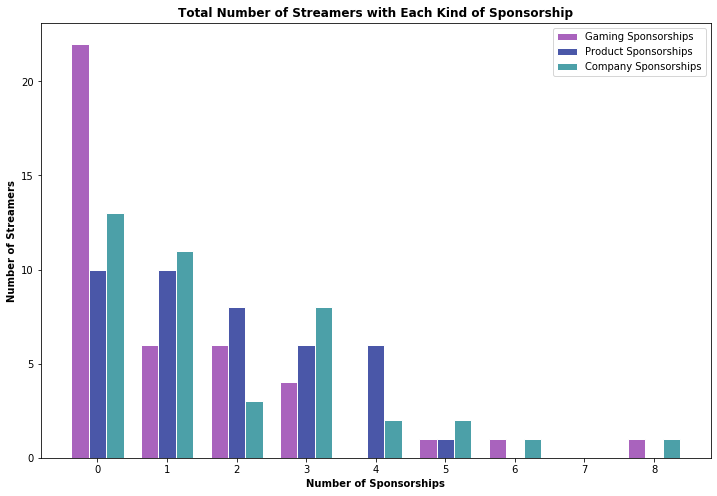

Total Gaming Sponsorships: 49
Total Product Sponsorships: 73
Total Company Sponsorships: 73


Average Gaming Sponsorships Recieved: 1.1951219512195121
Average Product Sponsorships Recieved: 1.7804878048780488
Average Company Sponsorships Recieved: 1.7804878048780488


In [11]:
# Here we set the width of bar.
barWidth = 0.25
 
# Here, we set the heights of each bar by inserting values from above for each catagory.
# The first number in each list will correspond to 0 sponsorships, the second to 1 sponsorship, etc... 
# Gaming_bar corresponds to the totalled values of gaming sponsorships, grouped by value.
# Paming_bar corresponds to the totalled values of gaming sponsorships, grouped by value.
# Caming_bar corresponds to the totalled values of gaming sponsorships, grouped by value.
gaming_bar = [22, 6, 6, 4, 0, 1, 1, 0, 1]
product_bar = [10, 10, 8, 6, 6, 1, 0, 0, 0]
company_bar = [13, 11, 3, 8, 2, 2, 1, 0, 1]
 
# Here we set the position of the bars on the x-axis.
r1 = np.arange(len(gaming_bar))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Constructing the grouped plot. 
plt.bar(r1, gaming_bar, color = '#a963bd', width = barWidth, edgecolor = 'white', label = 'Gaming Sponsorships')
plt.bar(r2, product_bar, color = '#4a57a8', width = barWidth, edgecolor = 'white', label = 'Product Sponsorships')
plt.bar(r3, company_bar, color = '#4ca0a8', width = barWidth, edgecolor = 'white', label = 'Company Sponsorships')


# Add xticks on the middle of the group bars.
plt.xlabel('Number of Sponsorships', fontweight = 'bold')
plt.ylabel('Number of Streamers', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(gaming_bar))], ['0', '1', '2', '3', '4', '5', '6', '7', '8'])

# Setting the size of the figure. 
fig = plt.gcf()
fig.set_size_inches(12, 8)

# We create the title for the graph
plt.title("Total Number of Streamers with Each Kind of Sponsorship", fontweight = 'bold')

# We create a legend & show the graph.
plt.legend()
plt.show()

# Next, we print the total amount of sponsorships per catagory. 
gaming_sponsorship_total = df['Gaming Sponsorship'].sum()
product_sponsorship_total = df['Product Sponsorship'].sum()
company_sponsorship_total = df['Company Sponsorship'].sum()

print ("Total Gaming Sponsorships:", gaming_sponsorship_total)
print ("Total Product Sponsorships:", product_sponsorship_total)
print ("Total Company Sponsorships:", company_sponsorship_total)
print('\n')

# Finally, we print the mean number of sponsorships per catagory
gaming_mean = df["Gaming Sponsorship"].mean()
product_mean = df["Product Sponsorship"].mean()
company_mean = df["Company Sponsorship"].mean()

print ("Average Gaming Sponsorships Recieved:", gaming_mean)
print ("Average Product Sponsorships Recieved:", product_mean)
print ("Average Company Sponsorships Recieved:", company_mean)

#### Results of Sponsorship Analysis:
To our surprise, we see that ***gaming sponsorships are the least type of sponsorships obtained*** by streamers,and that there's a ***tie between product and company sponsorships*** that were obtained by streamers. Furthermore, our data suggests that on average, a streamer can expect ~1.2 gaming sponsorships and ~1.8 product/company sponsorships. This raises a question then, how come gaming companies are not sponsoring popular streamers, who have huge platforms to play their games? After some more research/brainstorming we believed it might have something to do with the attitude/personality of the streamers. 

We believe this is because gaming companies might want to appeal to a certain demographic of gamers. For example, a gaming company that makes a game rated for teens and chidlren, will not give their game to a adult-rated or mature streamer because the sentimnent of said streamer might degrade the company and their game. However, a product company that sells gaming headsets to gamers in general, has less strict guidlines on what type of content creators can wear their equipment. Therefore, to properly analyze this, we move on to our second section of data analysis: Sentiment Analysis.

## Sentiment Analysis: 
In addition to looking at the sponsorship data for our group of selected streamers, we decided to do a sentiment analysis of their Twitter tweets to see if there was anything that may indicate a connection between their overall attitude on Twitter and getting a sponsorship.

To do this, we used the pre-existing CSV files created by the get_all_tweets function and read them into a dataframe to be processed by a few functions based off of the Natural Langauge Toolkit (NLTK) package.

Here we will only interrate through three separate streamers, one with the lowest score, one with the highest, and one at or around the average compound sentiment score for our sample of 40

In [12]:
#Creating the three dataframes for our observations
df_anomalyxd = pd.read_csv('https://raw.githubusercontent.com/COGS108/group48_sp20/master/Twitter%20CSV%20Files/anomalyxd_tweets.csv?token=AO77G3TVIXLGX3SWOTJKYZ264GYY2', error_bad_lines = False)
df_drlupo = pd.read_csv('https://raw.githubusercontent.com/COGS108/group48_sp20/master/Twitter%20CSV%20Files/DrLupo_tweets.csv?token=AO77G3UO5YRTYFO2AEWVZUC64GXXO', error_bad_lines = False)
df_cohhcarnage = pd.read_csv('https://raw.githubusercontent.com/COGS108/group48_sp20/master/Twitter%20CSV%20Files/cohhcarnage_tweets.csv?token=AO77G3VODZVLLDEZCUQMJV264GZAG', error_bad_lines = False)

The functions we created for our sentiment analysis were adapted versions of the example code from Professor Ellis's sentiment analysis lecture (06_04). We created functions that would 1) help us acquire a score for each one of a streamer’s tweets and 2) graph out their overall tweet sentiments scores.

In [13]:
#The function we used to get a sentiment score dataframe for each streamer
stop_words = set(stopwords.words('english'))

def get_sentiment(df): #We pass in our dataframes from earlier
    
    #This applies the word tokenizer and removes any stopwords listed in the NLTK package
    df['tokenized_text'] = df['text'].apply(word_tokenize)
    df['no-stopwords_text'] = df['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])
    
    most_list = list(df['text'].values)
    #This gives us a dataframe of all our streamer's tweets and then begins analyzing it
    output = pd.DataFrame()
    
    analyser = SentimentIntensityAnalyzer()
    for sentence in most_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

To refrain from taking up space with 40 dataframes, we will only execute our get_sentiment function on one dataframe just to take a look at what our dataframe looks like and what the columns are.

In [14]:
get_sentiment(df_anomalyxd)

,compound,neg,neu,pos,sentence
0,0.0000,0.000,1.000,0.000,@TDM_Jesus I have Crusty Mike https://t.co/vXP...
1,0.0000,0.000,1.000,0.000,RT @anomalyxd: NEW VIDEO: TWITCH HIGHLIGHTS 25...
2,0.0000,0.000,1.000,0.000,NEW VIDEO: TWITCH HIGHLIGHTS 25 - 6480° TRICKS...
3,0.0000,0.000,1.000,0.000,@flav06268180 @anomalyskins 😎👌
4,0.6239,0.000,0.796,0.204,RT @anomalyskins: 🎁 STATTRAK™ HUNTSMAN MARBLE ...
...,...,...,...,...,...
3240,0.0000,0.000,1.000,0.000,@csgo_dev https://t.co/rB578wpDHh
3241,0.6597,0.000,0.649,0.351,@sammathews Tissues to clean up the flooding i...
3242,0.0000,0.000,1.000,0.000,"For those asking how much money it was, it was..."
3243,0.1823,0.134,0.632,0.235,"Okay good shit, I just talked to Tayroc and sa..."


The scores given in the resulting data frames gave out a Compound score for each tweet followed by a rating for negative, neutral, or positive sentiment based on the analyzer in the NLTK package. A compound score <=-0.5 indicates a negative sentiment while a score >=0.5 indicates a positive sentiment. Values >-0.5 and <0.5 were deemed as neutral.

After receiving the data frame for each streamer’s tweets, we created a function that graphed that streamer’s overall sentiment based on their compound (aggregated) sentiment scores for each tweet. This function produces a frequency graph of a streamer’s compound tweet sentiment as well as an average compound score based on all their tweets we collected.

In [15]:
#The function we used to create graphs for each streamer's compound sentiment scores
def graph_sentiment(df, streamer_name):
    df_graph = get_sentiment(df)
    df_graph['compound'].plot.hist( color = 'skyblue', edgecolor = 'black', density = False, bins = int(25))
    
    plt.xlabel('Compound Sentiment Scores for '+streamer_name)
    plt.ylabel('Number of tweets at or around this score')
    plt.xlim(-1,1);
    plt.title("Compound score distribution for "+streamer_name, fontweight = 'bold')
    
    print (streamer_name+"'s average compound sentiment score is",get_sentiment_avg(df))

In [16]:
#Finally, our function for getting a streamer's average compound sentiment score
def get_sentiment_avg(df):
    callDF = get_sentiment(df)
    getAVG = callDF.compound.mean()

    return getAVG

Now applying these functions to our three example dataframes:

anomalyxd's average compound sentiment score is 0.043711278890600794


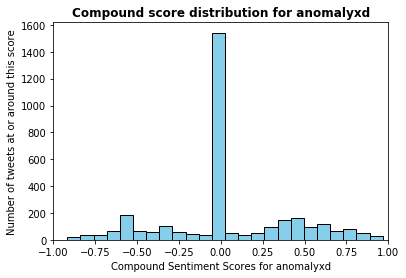

In [17]:
graph_sentiment(df_anomalyxd, 'anomalyxd')

DrLupo's average compound sentiment score is 0.15707290824261289


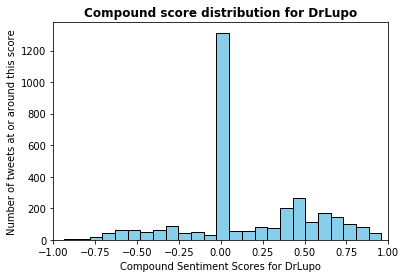

In [18]:
graph_sentiment(df_drlupo, "DrLupo")

CohhCarange's average compound sentiment score is 0.32211232330554623


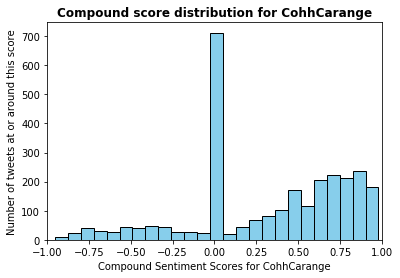

In [19]:
graph_sentiment(df_cohhcarnage, "CohhCarange")

#### Results of Sentiment Analysis:
What we find is that nobody in our group of 40 streamers falls below 0 in their average compound sentiment scores, and even more surprisingly is that when we graph any given streamer’s tweet sentiment, there is a large amount of tweets rated at neutral (0.0) or just above it. The lowest average compound sentiment score we recorded is 0.04371127889, belonging to anomalyxd, while the highest score belongs to CohhCarnage at 0.3221123233. We found the average compound score amongst our data to be 0.147265466. The number itself does not tell the whole story which is why it is important to see the distribution of sentiment scores for streamers at the lower, midpoint, and upper overall scores, which is just what we did above.

We can see that streamer anomalyxd has far more just-below-neutral to neutral tweets in addition to a balancing amount of negative and positive tweets. In comparison, both DrLupo and CohhCarnage have less neutral tweets and far more positive tweets. In the case of CohhCarnage, many of their tweets have highly positive sentiment in combination with far less negative tweets which could explain why his particular average compound score is significantly higher than that of anomalyxd's and DrLupo's.

A good question to ask after this would be whether a streamer's sentiment on Twitter reflects the amount of sponsorships they receive.

## Cross Referencing Our Analysis:
Now that we have each user assigned to a score for sentiment as well as their total sponsorships, views and followers, we will begin our final stage of analysis. In this section we will cross reference the overall attitude/personality of a streamer (how friendly/positive or unfriendly/negative) with the amount of views and followers to they have and see if there is a correlation between them being positive/friendly and them recieving sponsorships.

- To begin this, we will first use the .CSV file created from our Sentiment Analysis section, and merge its "Average Score" with our main dataframe.
- Next we will plot the sentiment score, total sponsorships, total views, and total followers columns in a scatter matrix to extablish any correlations.
- From there we will do further analysis to draw a conclusion. 

In [20]:
# Reading in our .csv file
df3 = pd.read_csv('https://raw.githubusercontent.com/COGS108/group48_sp20/master/Streamer%20Sentiment%20Score%20Averages%20-%20Sheet1%20(1).csv?token=AO74AYL3R77DGYWVLSRGBTC64QYHK')

# Dropping rows with streamer names, sorted scores, and other information,
# only keeping the "Average Score" column.  
df3 = df3.drop(['Streamer Name (Alphabetical)', 'Sorted by Highest Score to Lowest', 'Unnamed: 3'], axis = 1)

# Combining the average sentiment score with our main dataframe.
avg_score = df3['Average Score']
df = df.join(avg_score)
df.head()

,Streamer Name,Gaming Sponsorship,Product Sponsorship,Company Sponsorship,Total Sponsorships,Total Views,Total Followers,Average Score
0,Amouranth,1,0,0,1,125149929,1530432,0.125453
1,Anomalyxd,3,2,0,5,60313699,2656355,0.043711
2,Bugha,0,1,0,1,44716831,2028084,0.106063
3,Castro1021,0,1,1,2,87382162,2340592,0.138505
4,Cdnthe3rd,1,1,1,3,53189142,2011463,0.120742


Now our main dataframe contains an Average Score column which houses the sentiment score for each streamer. In the following cell we create a scatter matrix for the "Total sponsorships", "Total Views", "Total Followers", and "Average Score" columns to see correlations between the four.

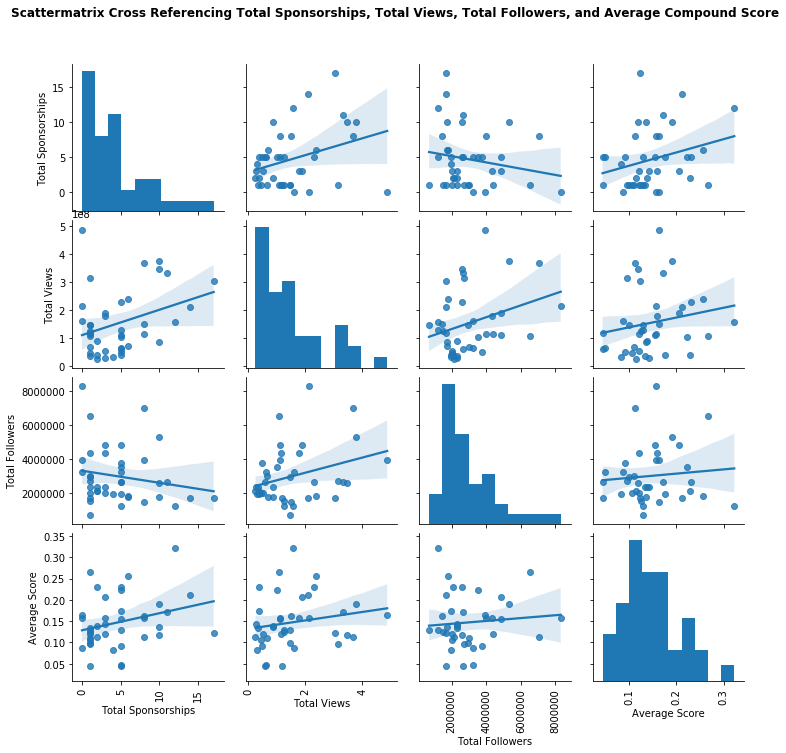

In [21]:
# Creating a correlogram with a regression line using seaborn.
# We will also write additional code to rotate the x-axis labels 90-degrees for aesthetical/visual clarity. 
plot = sns.pairplot(df[['Total Sponsorships', 'Total Views', 'Total Followers', 'Average Score']], kind="reg")
plot.fig.draw(plot.fig.canvas.get_renderer())
# required, as matplotlib calculates ticks during draw time
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Scattermatrix Cross Referencing Total Sponsorships, Total Views, Total Followers, and Average Compound Score',
                 fontweight = 'bold')
for ax in plot.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.show()

At first glance, analyzing Average Score with with the other vaiables, we see the following effects:
- Average Score has a slight increasing positive correlation with Total Followers, suggesting that as followers for a streamer increase, their Average Score will increase ever so slightly as well. This weakly falls in line with our Null Hypothesis that the bigger someone's following is, the nicer/more positive they would have to be.
- Average Score has a moderate increasing positive correlation with Total Views. As above, this could hint that a nicer and more positive streamer will attract a larger audience. 
- Lastly, Average Score also has an increasing positive correlation with Total Sponsorships, meaning positive streamers will likely attract more sponsorships. 

Once again, taking a quick glance at our correlogram, we can see that our Null Hypothesis contains merit. However to truely verify our data we will have to follow this up with statistical tests.

In [22]:
sns.set(style="white", font_scale=2)

# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

warnings.filterwarnings('ignore')

In [23]:
# We rename certain columns we'll be using for our statistical tests to not have two words. 
# This is because the OLS Regression test we plan to run in a bit won't run unless we make this change. 
df.rename(columns = {'Total Sponsorships':'Total_Sponsorships', 'Average Score':'Average_Score', 'Total Views':'Total_Views', 'Total Followers':'Total_Followers'}, inplace = True)
df.head()

,Streamer Name,Gaming Sponsorship,Product Sponsorship,Company Sponsorship,Total_Sponsorships,Total_Views,Total_Followers,Average_Score
0,Amouranth,1,0,0,1,125149929,1530432,0.125453
1,Anomalyxd,3,2,0,5,60313699,2656355,0.043711
2,Bugha,0,1,0,1,44716831,2028084,0.106063
3,Castro1021,0,1,1,2,87382162,2340592,0.138505
4,Cdnthe3rd,1,1,1,3,53189142,2011463,0.120742


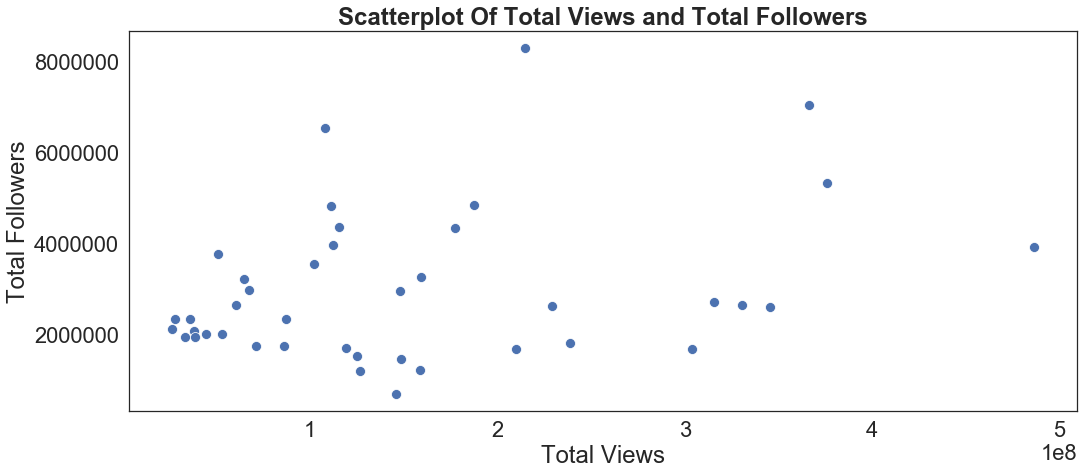

In [24]:
sns.scatterplot(x = 'Total_Views', y = 'Total_Followers', data = df, s = 100)
plt.xlabel('Total Views')
plt.ylabel('Total Followers');
plt.title('Scatterplot Of Total Views and Total Followers', fontweight = 'bold');

,Streamer Name,Gaming Sponsorship,Product Sponsorship,Company Sponsorship,Total_Sponsorships,Total_Views,Total_Followers,Average_Score
14,GamesDoneQuick,8,4,5,17,303841492,1695396,0.123206
15,Imaqtpielol,3,3,5,11,330611219,2663372,0.171779
17,Lirik,5,4,1,10,345278855,2613639,0.118058
27,Shroud,2,4,2,8,366390620,7051896,0.112417
28,Sodapoppintv,0,0,1,1,315584818,2715614,0.096264
29,Summit1g,2,5,3,10,376058521,5339155,0.190947


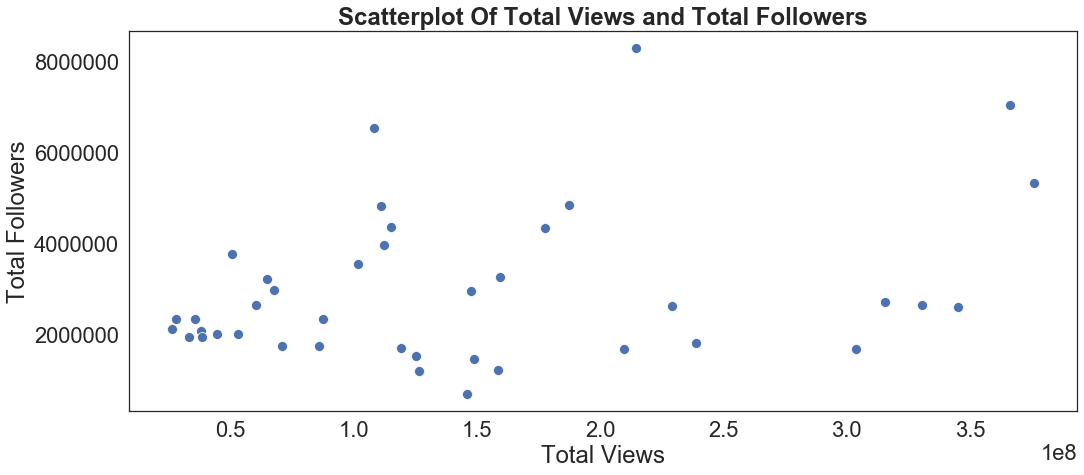

In [25]:
df[df['Total_Views'] > 400000000]
df = df[df['Total_Views'] < 400000000]
sns.scatterplot(x = 'Total_Views', y = 'Total_Followers', data = df, s = 100)
plt.xlabel('Total Views')
plt.ylabel('Total Followers');
plt.title('Scatterplot Of Total Views and Total Followers', fontweight = 'bold');
df[df['Total_Views'] > 300000000]

Here we remove the ESLCS. If you are familiar with gaming, you know that the ESLCS is a world-wide league for CS-GO pro gamers Because our analysis is focusing on smaller streamers, removing the ESLCS will help yield better results, since it won't skew out data. Looking at the new plot, with ESLCS removed, the six points on the right seem like they could be outliers. Checking what they are however, they are for the most part regular streamers, with GamesDoneQuick being the exception, since they are a fundraising channel. The others however, have been streaming on twitch since twitch's launch mid 2011.

Next, to ensure we can run our multiple linear regression, we look at each of our variables to make sure they are normall distributed. Here, we see that the "Total Views" column is skewed right, so we apply a log transformation to "normalize" the distribution.

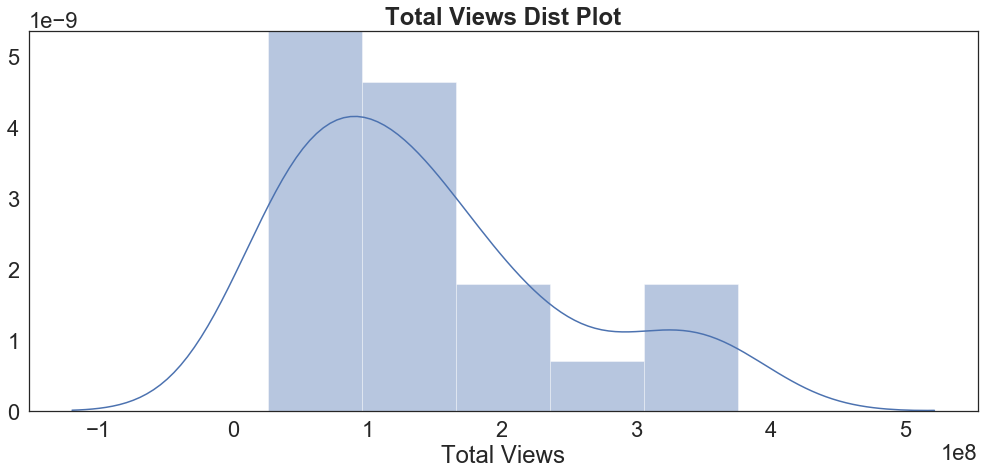

In [26]:
sns.distplot(df['Total_Views'][df['Total_Views'].notnull()], hist = True)
plt.xlabel('Total Views');
plt.title('Total Views Dist Plot', fontweight = 'bold');

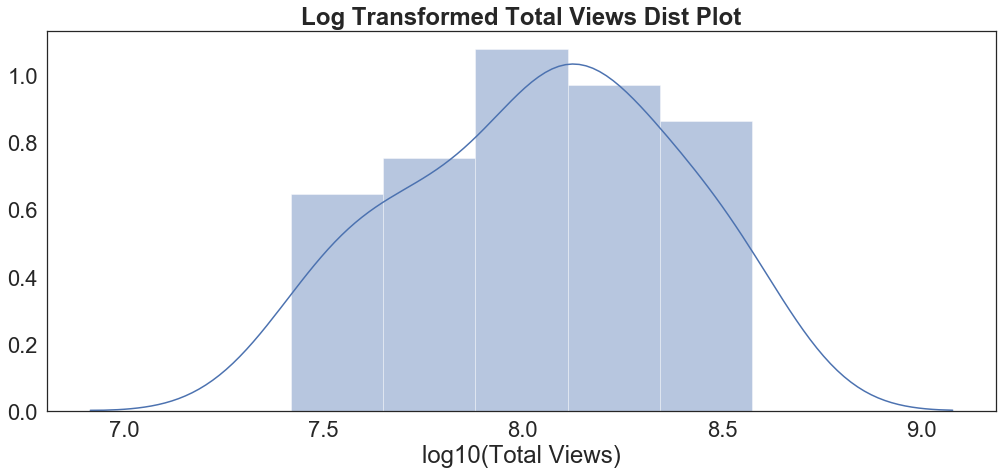

In [27]:
df['Total_Views10'] = np.log10(df['Total_Views'])
sns.distplot(df['Total_Views10'][df['Total_Views10'].notnull()], hist = True)
plt.xlabel('log10(Total Views)');
plt.title('Log Transformed Total Views Dist Plot', fontweight = 'bold');

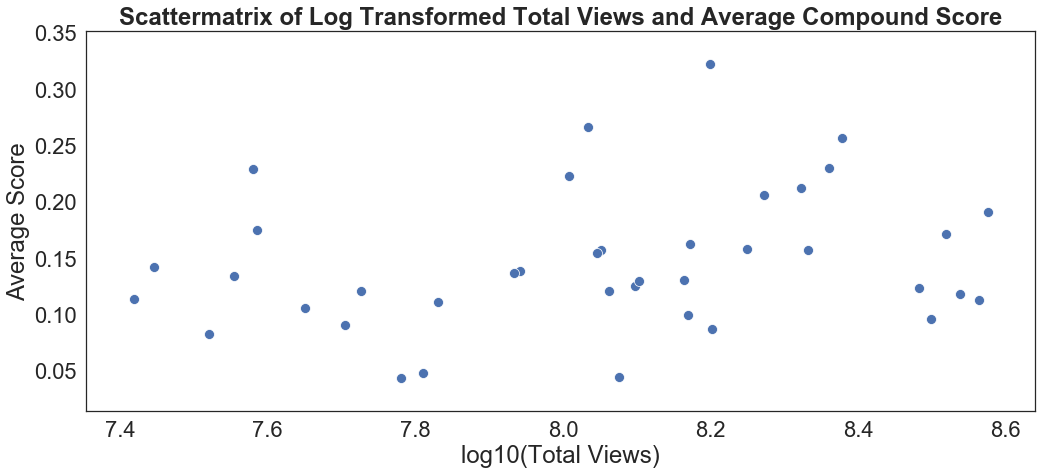

In [28]:
sns.scatterplot(x = 'Total_Views10', y = 'Average_Score', data = df, s = 100)
plt.xlabel('log10(Total Views)')
plt.ylabel('Average Score');
plt.title('Scattermatrix of Log Transformed Total Views and Average Compound Score', fontweight = 'bold');

Graphing the newly transformed "Total Views" column, we can clearly see that there is no multiple colinearity, which means we will be able to continue with our multiple linear regression.

Again, taking a look the the "Average Score" column, we see that it follows a normal distribution, so we do not need to do a log transformation.

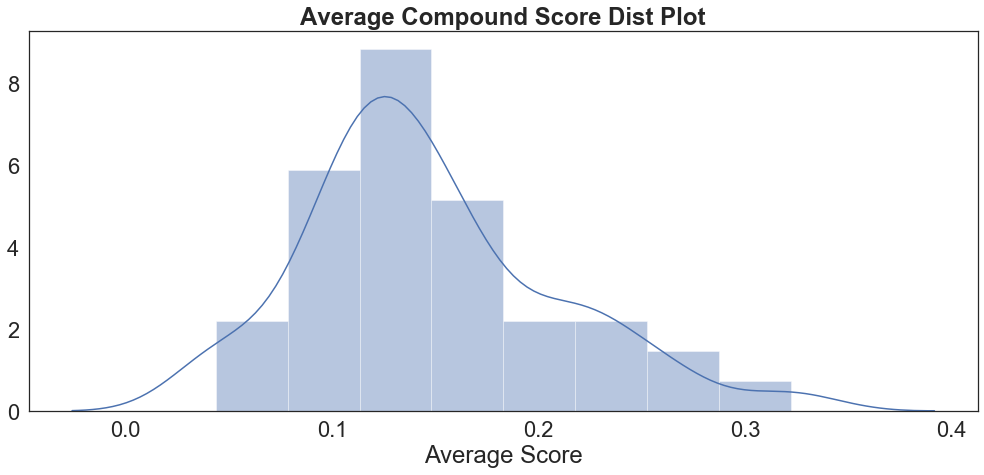

In [29]:
sns.distplot(df['Average_Score'][df['Average_Score'].notnull()], hist = True)
plt.xlabel('Average Score');
plt.title('Average Compound Score Dist Plot', fontweight = 'bold');

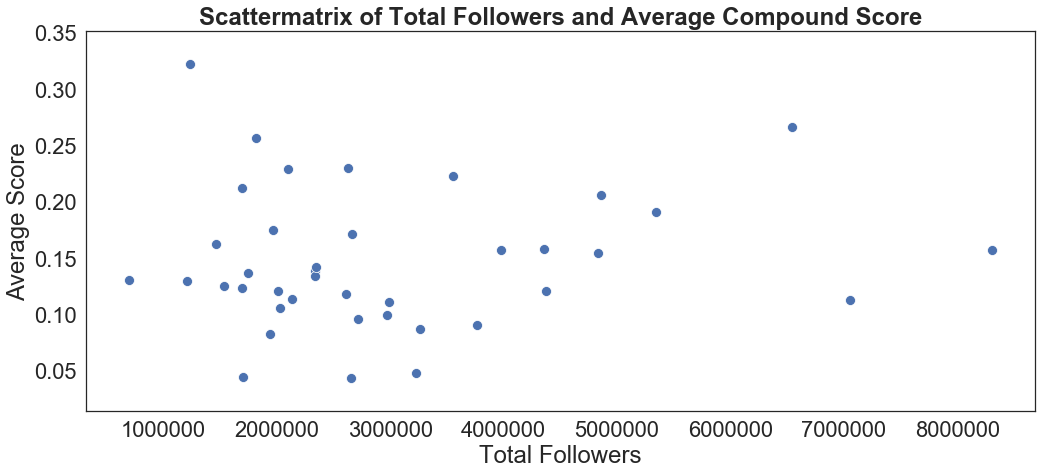

In [30]:
sns.scatterplot(x = 'Total_Followers', y = 'Average_Score', data = df, s = 100)
plt.xlabel('Total Followers')
plt.ylabel('Average Score');
plt.title('Scattermatrix of Total Followers and Average Compound Score', fontweight = 'bold');

In [31]:
df[df['Total_Followers'] > 6000000]

,Streamer Name,Gaming Sponsorship,Product Sponsorship,Company Sponsorship,Total_Sponsorships,Total_Views,Total_Followers,Average_Score,Total_Views10
27,Shroud,2,4,2,8,366390620,7051896,0.112417,8.563944
32,Tfue,0,0,0,0,214700644,8304500,0.157497,8.331833
37,Tsm_myth,0,0,1,1,108188602,6544707,0.266337,8.034182


Though there are outliers here, the streamers with more than 6,000,000 followers offer valuable information, since they are not big corporations, like Riot Games.

Finally, checking out "Total Followers" column, we see that it is also skewed right, so it is in need of a log transformation.

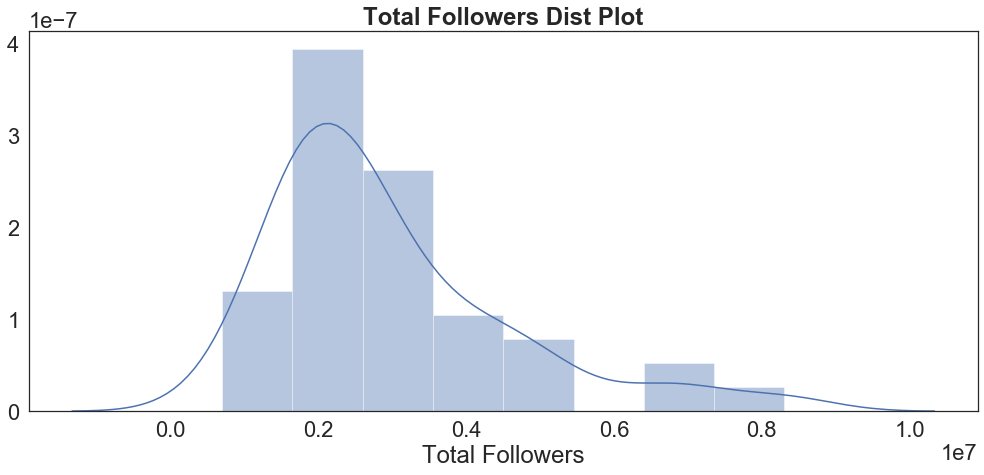

In [32]:
sns.distplot(df['Total_Followers'][df['Total_Followers'].notnull()], hist = True)
plt.xlabel('Total Followers');
plt.title('Total Followers Dist Plot', fontweight = 'bold');

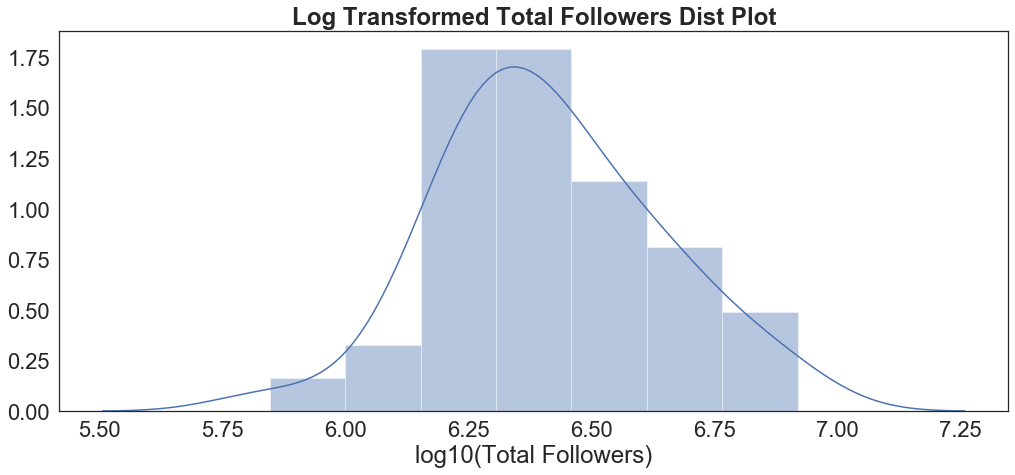

In [33]:
df['Total_Followers10'] = np.log10(df['Total_Followers'])
sns.distplot(df['Total_Followers10'][df['Total_Followers10'].notnull()], hist = True)
plt.xlabel('log10(Total Followers)');
plt.title('Log Transformed Total Followers Dist Plot', fontweight = 'bold');

In [34]:
outcome, predictors = patsy.dmatrices('Total_Sponsorships ~ Average_Score + Total_Followers10 + Total_Views10', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Sponsorships   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     4.571
Date:                Mon, 08 Jun 2020   Prob (F-statistic):            0.00837
Time:                        22:12:10   Log-Likelihood:                -104.20
No. Observations:                  39   AIC:                             216.4
Df Residuals:                      35   BIC:                             223.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -10.5369     20.45

Running a multiple linear regression, using the OLS approach, shows that "Average Score" has the highest impact. When it comes to interpretting the transformed data, we need to remember that the factor of increase(or decrease) is divided by 100. So for each follower, total sponsorships actually decreases by 0.0471, when average score and total views is constant. Similarly, for each view, total sponsorships increases by 0.0542. And when everything else is constant besides average score, total sponsorships increases by 13.026.

**TotalSponsorships = -10.5369 + 13.0262(AverageScore) - 4.7082(log10(TotalFollowers)) + 5.4172(log10(TotalViews))**

Looking at the above formula may make very little sense, but breaking down what we were doing our analysis on, the numbers do make sense. Taking a look at the transformed "Total Views" and "Total Followers" columns, the streamers observed have millions of followers and hundreds of millions, if not billions of views. Plugging in some of those values in, in addition to the average compound score, the values do add up.

# Ethics & Privacy

Regarding the permission of our data, we used Twitter API (application programming interface) to gather the data we need. Those data (tweets) on the API are shared publicly. For the privacy concerns, we used streamers’ usernames, and not their real names, as essential individual identifications. Other than that, we only collect time of tweets and their contents which are public information shared by the Twitch API. We could also only obtain up to 3240 tweets per twitter user as that was the maximum number the Twitter API guidelines would allow us to gather. We admit there are some potential risks of privacy because streamers might publish something private on twitter, and due to the technical issue, we can’t detect private information, but overall, in our data cleaning we only keep tweets that contained "sponsorship" or "partnership" in them. Therefore, we believe the risk of a potential privacy breach to be extremely low.

Our data includes top 50 streamers which means we don’t have the bias issue of datasets selection. However, the number of male streamers is significantly higher than that of female streamers. We certainly didn’t mean to get mostly males in our list of streamers, that is what Twitch happen to give us. We understand that this might cause a potential bias in our analysis, however we believe that since our project aims to analyse the relationship between a streamer, their community, and the amount of sponsorships they get, it can very well be generalized for any streamer, regardless of their race, gender, or sexual orientation. The most serious harm is the potential privacy problem we mentioned above. 

Above mentioned things aside, we see little to no ethical or privacy issues with our dataframes and believe them to be as fair and transparent as we could have obtained! Finally, we do not expect our findings to yield any negative consequences, nor have any negative impact on any streamer. The reaserch we did aims to impach small streamers or new streamers and we hope it can help them grow and gain more sponsorships and success. 

# Conclusion & Discussion

After cleaning our data collected from twitter API, we were able to test our hypothesis that well-behaved game streamers would have more gaming sponsorship. From the sponsorship analysis, we found those streamers had less gaming sponsorship compared with product sponsorship and company sponsorship. We attributed this phenomenon to the assumption that gaming company needed to select their sponsorship more carefully. This assumption leaded to our sentiment and further analysis. After combing streamers’ sponsorship with their sentiment score, number of views, number of followers, and deleting outliners, we found that sentiment score had the highest impact from our equation compared to followers and views.

We partially reject our hypothesis that you will get lots of gaming sponsorships just because you are a gamer and you are known to be nice. We find that if you behave nicely on the internet, you are more likely to earn followers and viewers, which then attract more sponsorships. This conclusion is coherent with our hypothesis. However, the sponsorship you get are less likely to be gaming sponsorship.

As we mentioned in the background section, we came up with this question just because we all watch streaming. After going through the whole research and analysis, we think our research can also give people who want to become streamers some ideas. If they want to earn more money though streaming, they should try to be nicer and engage with their community more. By doing so they will increase their following and views, which will attract sponsors. 

# Team Contributions

- **Servin Wayne Vartanian:** He contributed to the project by being one of the two people responsible for pulling tweets from the Twitter API using the function. He was also one of the two people who manually went through the sifted tweets per person, and co-created the csv file which we use as df1, containing the number of sponsorships each streamer had. He also helped research background info, and refine our hypothesis and research question. Finally he did the code in the Sponsorship Analysis section and helped in the Cross Referenced  section in our Data Analysis. 

- **Rem Talde:** He contrubiuted to the project by being the person to go into the Twitch API and pull the top 50 streamers, through which he was also able to get each streamer's total views and total followers. He was also one of the two people doing sentiment analysis with our tweets to determine the positivity/negativity of a streamers attitude/community. He also helped refine our hypothesis and research question, as well as tackling the overview section. Finally, he was also involved in our results section and was available overall.

- **Brett Salinas:** He contributed to the project by being one of the two people responsible for pulling tweets from the Twitter API using the function. He also created the function we used to sift through Tweets, only keeping ones with "sponsorship" or "partnership" in them. He then used those collected tweets to run Sentiment Analysis to establish a score of positivity/negativity for each streamer and see what their general attitude and friendlyness was. He also helped research background info, and refine our hypothesis and research question. Finally, he was also involved in our results section.

- **Fan Yu:** He contributed to the project by being one of the two people who manually went through the sifted tweets per person, and co-created the csv file which we use as df1, containing the number of sponsorships each streamer had. He was also the one responsible for the Ethics and Privacy section, doing extensive research and making sure our project did not involve any personal information which could expose private events in any streamer's lives. He also helped cross reference sponsorship count with positivity of stream.